# **Регуляризация деревьев решений. Контрольное задание**

# **1. Подготовка исходных данных**

Сгенерировать исходные данные для обучения модели дерева решений.

Значения параметров выбираются из таблицы "Варианты".docx в соответствие с номером студента в списке группы в СДО.

Для задачи регрессии.

In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 542,
                       n_features = 2,
                       n_informative = 1,
                       noise = 10.3,
                       random_state = 10)

Разделить выборку на обучающую и тестовую.

Доля объектов в тестовой выборке - 0,3.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 10)


In [3]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
R2_train = r2_score(y_train, y_pred_train)

MSE_test = mean_squared_error(y_test, y_pred_test)
R2_test = r2_score(y_test, y_pred_test)

print(f"MSE_train: {MSE_train}, R2_train: {R2_train}")
print(f"MSE_test: {MSE_test:.4f}, R2_test: {R2_test:.4f}")

MSE_train: 0.0, R2_train: 1.0
MSE_test: 161.7506, R2_test: 0.9638


# **2. Подбор оптимальных гиперпараметров модели дерева решений**

Осуществить подбор гиперараметров модели дерева решений:
-  `max_depth`;
- `min_samples_leaf`;
- `max_features`.

## Использование валидационных кривых

Построить валидационные кривые для оценивания оптимального диапазона изменения гиперпараметров.

Параметр кросс-валидации - 5.

Метрика качества модели дерева решений:
- для классификации - accuracy;
- для регрессии - R2.

Построить валидационные кривые для гиперпараметра `max_depth`.

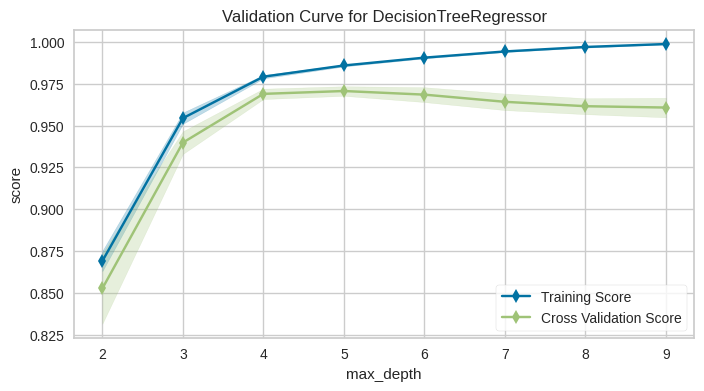

In [5]:
from yellowbrick.model_selection import ValidationCurve
import numpy as np
viz = ValidationCurve(DecisionTreeRegressor(),
                      param_name = 'max_depth',
                      param_range = np.arange(2, 10),
                      cv = 5,
                      scoring = 'r2',
                      size = (800, 400),
                      n_jobs = -1)
viz.fit(X_train, y_train)
viz.show();

Обучить модель дерева решений с оптимальным значением гиперпараметра `max_depth` и оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [6]:
tree_temp_1 = DecisionTreeRegressor(random_state = 10,
                                  max_depth = 5)
tree_temp_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [7]:
y_pred_train1 = tree_temp_1.predict(X_train)
y_pred_test1 = tree_temp_1.predict(X_test)

MSE_train = mean_squared_error(y_train, y_pred_train1)
R2_train = r2_score(y_train, y_pred_train1)

MSE_test = mean_squared_error(y_test, y_pred_test1)
R2_test = r2_score(y_test, y_pred_test1)

print(f"MSE_train: {MSE_train:.4f}, R2_train: {R2_train:.4f}")
print(f"MSE_test: {MSE_test:.4f}, R2_test: {R2_test:.4f}")

MSE_train: 75.5926, R2_train: 0.9849
MSE_test: 124.5484, R2_test: 0.9721


Построить валидационные кривые для гиперпараметра `min_samples_leaf`.

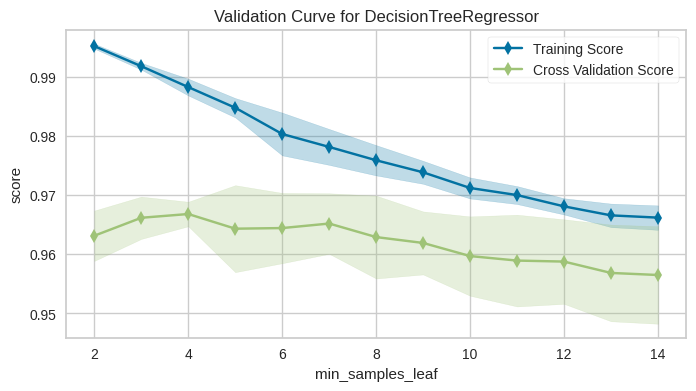

In [8]:
viz = ValidationCurve(DecisionTreeRegressor(),
                      param_name = 'min_samples_leaf',
                      param_range = np.arange(2, 15),
                      cv = 5,
                      scoring = 'r2',
                      size = (800, 400),
                      n_jobs = -1)
viz.fit(X_train, y_train)
viz.show();

Обучить модель дерева решений с оптимальным значением гиперпараметра `min_samples_leaf` и зафиксированным на предыдущем шаге значением гиперпараметра `max_depth`.

Оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [9]:
tree_temp_2 = DecisionTreeRegressor(random_state = 10,
                                  max_depth = 5,
                                    min_samples_leaf = 4)
tree_temp_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=10)

In [10]:
y_pred_train2 = tree_temp_2.predict(X_train)
y_pred_test2 = tree_temp_2.predict(X_test)

MSE_train = mean_squared_error(y_train, y_pred_train2)
R2_train = r2_score(y_train, y_pred_train2)

MSE_test = mean_squared_error(y_test, y_pred_test2)
R2_test = r2_score(y_test, y_pred_test2)

print(f"MSE_train: {MSE_train:.4f}, R2_train: {R2_train:.4f}")
print(f"MSE_test: {MSE_test:.4f}, R2_test: {R2_test:.4f}")

MSE_train: 81.9680, R2_train: 0.9836
MSE_test: 140.2744, R2_test: 0.9686


Построить валидационные кривые для гиперпараметра `max_features`.

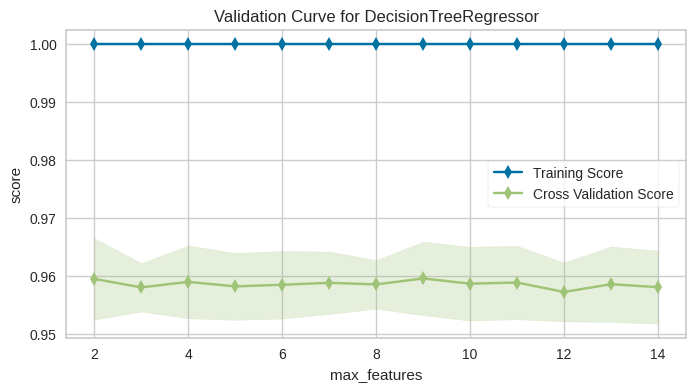

In [11]:
viz = ValidationCurve(DecisionTreeRegressor(),
                      param_name = 'max_features',
                      param_range = np.arange(2, 15),
                      cv = 5,
                      scoring = 'r2',
                      size = (800, 400),
                      n_jobs = -1)
viz.fit(X_train, y_train)
viz.show();

Обучить модель дерева решений с оптимальным значением гиперпараметра `max_features` и зафиксированными на предыдущих шагах значениями гиперпараметров `max_depth` и `min_samples_leaf` .

Оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [12]:
tree_temp_3 = DecisionTreeRegressor(random_state = 10,
                                  max_depth = 5,
                                    min_samples_leaf = 2,
                                    max_features = 2)
tree_temp_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=2, min_samples_leaf=2,
                      random_state=10)

In [13]:
y_pred_train3 = tree_temp_3.predict(X_train)
y_pred_test3 = tree_temp_3.predict(X_test)

MSE_train = mean_squared_error(y_train, y_pred_train3)
R2_train = r2_score(y_train, y_pred_train3)

MSE_test = mean_squared_error(y_test, y_pred_test3)
R2_test = r2_score(y_test, y_pred_test3)

print(f"MSE_train: {MSE_train:.4f}, R2_train: {R2_train:.4f}")
print(f"MSE_test: {MSE_test:.4f}, R2_test: {R2_test:.4f}")

MSE_train: 76.2370, R2_train: 0.9848
MSE_test: 126.9434, R2_test: 0.9716


Визуализировать полученное дерево решений.



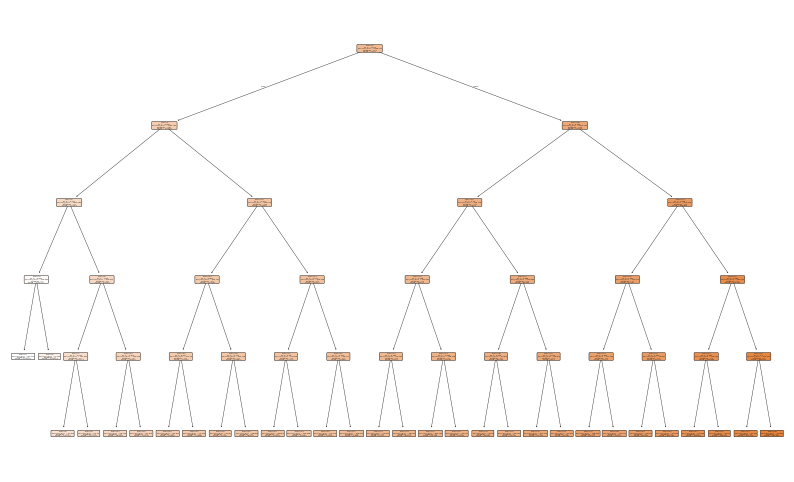

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plot_tree(tree_temp_3,
          impurity = True,
          node_ids = True,
          label = 'all',
          feature_names = ['x1', 'x2'],
          filled = True,
          rounded = True)
plt.show()

## Поиск на сетке

Определить оптимальные значения гиперпараметров модели дерева решений с использованием поиска на сетке.

Использовать `random_state` - номер варианта.

In [15]:
param_clf = {'max_depth': np.arange(2, 9),
             'min_samples_leaf': np.arange(1, 15),
             'max_features' : np.arange(1, 15)}

from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(DecisionTreeRegressor(random_state = 10),
                        param_grid = param_clf,
                        cv = 5,
                        scoring = 'r2')

grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='r2')

Вывести оптимальные значения гиперпараметров.

In [16]:
grid_clf.best_params_

{'max_depth': np.int64(5),
 'max_features': np.int64(2),
 'min_samples_leaf': np.int64(2)}

In [17]:
grid_clf.best_score_

np.float64(0.9713556096209907)

Обучить модель дерева решений с найденными оптимальными значениями гиперпараметров.

In [18]:
tree_clf_grid = grid_clf.best_estimator_
tree_clf_grid

DecisionTreeRegressor(max_depth=np.int64(5), max_features=np.int64(2),
                      min_samples_leaf=np.int64(2), random_state=10)

Вычислить метрику качества модели дерева решений на обучающей и тестовой выборках:
- для задачи классификации - accuracy;
- для задачи регрессии - R2.

In [19]:
y_pred_train_clf = tree_clf_grid.predict(X_train)
y_pred_test_clf = tree_clf_grid.predict(X_test)

MSE_train = mean_squared_error(y_train, y_pred_train_clf)
R2_train = r2_score(y_train, y_pred_train_clf)

MSE_test = mean_squared_error(y_test, y_pred_test_clf)
R2_test = r2_score(y_test, y_pred_test_clf)

print(f"MSE_train: {MSE_train:.4f}, R2_train: {R2_train:.4f}")
print(f"MSE_test: {MSE_test:.4f}, R2_test: {R2_test:.4f}")

MSE_train: 76.2370, R2_train: 0.9848
MSE_test: 126.9434, R2_test: 0.9716


## Отсечение дерева решений

Вычислить значения параметра регуляризации $\alpha$ и соответствующие им совокупные ошибки листьев в поддеревьях.

In [20]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 3.10154430e-06, 3.90612645e-06, 8.38381569e-06,
       2.00319525e-05, 2.15100148e-05, 2.81144547e-05, 3.79192943e-05,
       4.69430127e-05, 5.58185674e-05, 6.41831731e-05, 7.72178547e-05,
       8.63766216e-05, 9.54752259e-05, 1.02048512e-04, 1.05066875e-04,
       1.28749548e-04, 1.52650447e-04, 1.59099001e-04, 1.76228093e-04,
       2.48854702e-04, 3.48645870e-04, 3.49115424e-04, 3.75150807e-04,
       3.96511501e-04, 4.03699238e-04, 4.07189631e-04, 5.33886847e-04,
       5.59273529e-04, 5.67158078e-04, 6.62937176e-04, 6.98363601e-04,
       7.54312614e-04, 8.39143231e-04, 8.57505224e-04, 8.99306763e-04,
       9.56532599e-04, 9.90019230e-04, 1.11460152e-03, 1.18930269e-03,
       1.33125895e-03, 1.35221197e-03, 1.37190259e-03, 1.40489130e-03,
       1.45871569e-03, 1.60399679e-03, 1.70249337e-03, 2.16122734e-03,
       2.19993518e-03, 2.22502174e-03, 2.42853544e-03, 2.51986258e-03,
       2.81393333e-03, 2.90354304e-03, 3.07539858e-03, 3.08773444e-03,
      

Обучить модель дерева решений с найденными значениями параметра $\alpha$.

In [21]:
tree_trims = []
for ccp_alpha in ccp_alphas:
  tree_trim = DecisionTreeRegressor(random_state = 10,
                                    ccp_alpha = ccp_alpha)
  tree_trim.fit(X_train, y_train)
  tree_trims.append(tree_trim)
tree_trims[:5]

[DecisionTreeRegressor(ccp_alpha=np.float64(0.0), random_state=10),
 DecisionTreeRegressor(ccp_alpha=np.float64(3.101544299268589e-06),
                       random_state=10),
 DecisionTreeRegressor(ccp_alpha=np.float64(3.906126453462201e-06),
                       random_state=10),
 DecisionTreeRegressor(ccp_alpha=np.float64(8.3838156889145e-06),
                       random_state=10),
 DecisionTreeRegressor(ccp_alpha=np.float64(2.00319524982466e-05),
                       random_state=10)]

Для каждой обученной модели дерева решений вычислить метрики качества для обучающей и тестовой выборок:
- для задачи классификации - accuracy;
- для задачи регрессии - R2.

In [22]:
train_scores = [tree_trim.score(X_train, y_train) for tree_trim in tree_trims]
test_scores = [tree_trim.score(X_test, y_test) for tree_trim in tree_trims]

Построить график зависимости метрик качества для обучающей и тестовой выборок от параметра $\alpha$.

Оценить оптимальное значение параметра регуляризации $\alpha$.

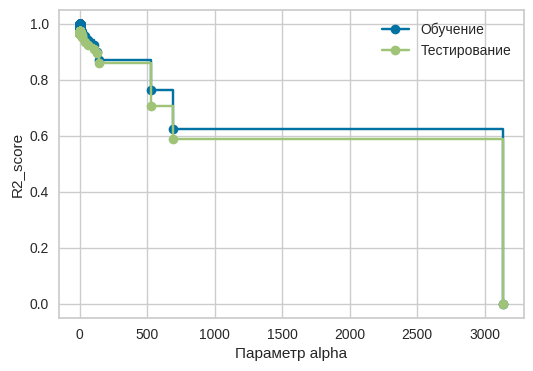

In [23]:
plt.figure(figsize = (6, 4))
plt.plot(ccp_alphas, train_scores, marker = 'o',
         label = 'Обучение', drawstyle = 'steps-post')
plt.grid()
plt.plot(ccp_alphas, test_scores, marker = 'o',
         label = 'Тестирование', drawstyle = 'steps-post')

plt.xlabel('Параметр alpha')
plt.ylabel('R2_score')
plt.legend()
plt.grid()

Обучить модель дерева решений с найденным значением параметра регуляризации $\alpha$, задав его значение в гиперпараметре `ccp_alpha`. Остальные гиперпараметры модели оставить по умолчанию.

In [24]:
tree_clf_prun = DecisionTreeRegressor(ccp_alpha = 5)
tree_clf_prun.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=5)

Вычислить метрику качества модели дерева решений на обучающей и тестовой выборках:
- для задачи классификации - accuracy;
- для задачи регрессии - R2.

In [25]:

r2_train = tree_clf_prun.score(X_train, y_train)
r2_test = tree_clf_prun.score(X_test, y_test)

print(f'r2 на обучении: {r2_train:.4f}')
print(f'r2 на тесте: {r2_test:.4f}')

r2 на обучении: 0.9803
r2 на тесте: 0.9677


# **3. Оценивание важности признаков**

Оценить степень важности признаков методом Mean decrease impurity (MDI).

Использовать атрибут `feature_importances_` классов `DecisionTreeClassifier` или `DecisionTreeRegressor` .

In [26]:
tree_clf_prun.feature_importances_

array([1., 0.])

In [27]:
import pandas as pd
feature_name = ['x1', 'x2']
df_imp = pd.DataFrame({'Признак': feature_name,
                       'Важность': tree_clf_prun.feature_importances_})
df_imp

,Признак,Важность
0,x1,1.0
1,x2,0.0


Построить диаграмму `bar` для визуализации степени важности признаков.

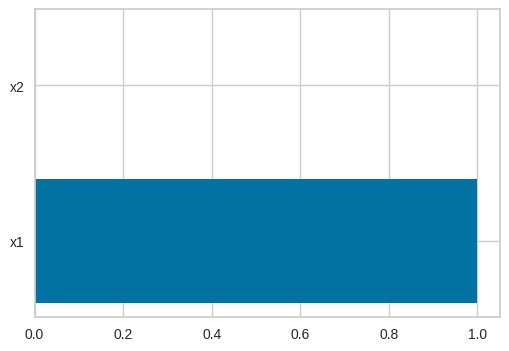

In [28]:
plt.figure(figsize = (6, 4))
plt.barh(df_imp['Признак'], df_imp['Важность'])
plt.show()

Оценить степень важности признаков методом Permutation feature importance.

Использовать лласс `permutation_importance` модуля `inspection` библиотеки `sklearn`.


In [29]:
from sklearn.inspection import permutation_importance
permutation_importance = permutation_importance(tree_temp_3,
                                                X_train, y_train,
                                                n_repeats = 10,
                                                random_state = 10,
                                                n_jobs = -1)

permutation_importance

{'importances_mean': array([1.9303373 , 0.00391483]),
 'importances_std': array([0.10170367, 0.00061977]),
 'importances': array([[1.83484845, 2.16342149, 1.9721971 , 2.02717951, 1.93951263,
         1.82160531, 1.88920231, 1.84190767, 1.962998  , 1.8505005 ],
        [0.00301417, 0.00423649, 0.0041017 , 0.00356054, 0.00495595,
         0.0034404 , 0.00458227, 0.00433773, 0.00300228, 0.00391674]])}

Построить диаграмму `bar` для визуализации степени важности признаков.

In [30]:
sorted_id = np.argsort(permutation_importance.importances_mean)
pos = np.arange(len(sorted_id))
pos

array([0, 1])

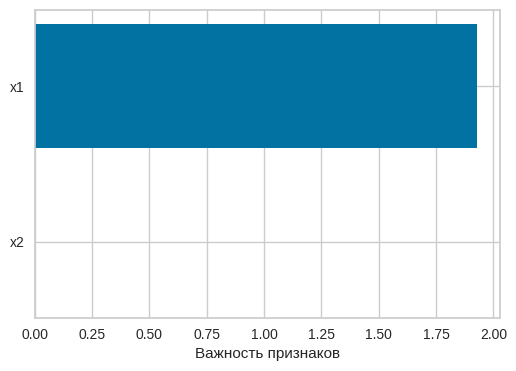

In [31]:
plt.figure(figsize = (6,4))
plt.barh(pos, permutation_importance.importances_mean[sorted_id])
plt.yticks(pos, np.array(feature_name)[sorted_id])
plt.xlabel('Важность признаков')
plt.show()